# Plotting av Focused Ion Beam data med matplotlib

Målet med denne Jupyter Notebooken er at dere skal lære hvordan man kan lage en figur med FIB data via `matplotlib`.

Denne figuren skal inneholde minst 2 forskjellige bilder, hvor bare de relevante delene i bildene er med. Denne figuren skal også ha annoteringer, sånn som scalebar, a), b) og tekst som indikerer relevant objekter.

Her så følger det med 3 eksempel bildefiler fra FIBen, denne Notebooken er designet for disse. Men det skal være enkelt for dere å tilpasse den til dataene dere har tatt opp.

Tingene dere skal gjøre i denne øvingen er operasjoner som ganske lett kunne gjøres med vanlige bilderedigeringsprogrammer, men disse ferdighetene bygger et fundament for å jobbe med de mer avanserte dataene dere skal jobbe med i både TEM og SEM dataøvingene.

## Denne dataøvingen

For denne dataøvingen anbefaler jeg:

1. Gå først igjennom Notebook med eksempelfilene: `bilde0.tif`, `bilde1.tif`, `bilde2.tif`
2. Deretter tilpass Notebooken til deres egne data. Her kan dere velge 2 eller flere bilder, gjerne noen dere planlegger å bruke i labrapporten.

## Innlevering

Både bildefilen og en `HTML` versjon av Jupyter Notebooken dere har brukt til å lage den, skal leveres via Blackboard. Frist fredag 14. oktober.

# Åpne data

La oss først kikke på en av TIFF filene fra FIBen. Disse kan vi f.eks. åpne ved hjelp av Python biblioteket `tifffile`. Importer dette biblioteket

Det er mange andre måter å åpne mikroskopi-data også, f.eks. ved å bruke biblioteket `HyperSpy`, som vi skal bruke neste dataøving som omhandler TEM.

Bruk funksjonen `imread` til å åpne `bilde0.tif` filen. Hvis du lurer på hvordan funksjonen virker, så kan du se på `docstring` til funksjonen ved å bruke `Shift` + `Tab`. Lagre denne til en variabel `bildedata0`

Nå kan vi se hva som er i bilde-dataen vi akkurat åpnet. Gjør dette ved å skrive `bildedata0` i cellen under, og kjør den

Her får vi opp noen verdiene som er i bildet. Dette er en `NumPy` array, som er et veldig viktig bibliotek i vitenskapelig Python. 

Men dette er ikke så altfor spennende! Sånne data er best å plotte i en figur.

`matplotlib` er et plotte-bibliotek i Python, som ofte brukes til å visualisere vitenskapelig data.

Importer sub-modulen `pyplot` i `matplotlib` og kall den `plt`

Så lag en figur av `bildedata0` ved å bruke `imshow` funksjonen i `plt`.

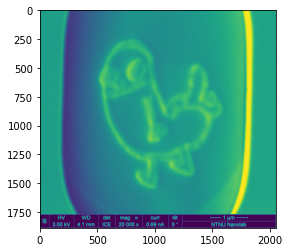

In [157]:
import tiffile
from matplotlib import pyplot as plt
f0 = tiffile.imread("bilde0.tif")
plt.imshow(f0)

## Forbedre figuren: beskjæring

Først: beskjære bildet, slik at vi bare får med selve vinduet.

Vi gjør dette via NumPy slicing. Syntaksen her er `[y0:y1, x0:x1]` som virker på arrayen som skal beskjæres. `NUMPYARRAY[10:20, 10:20]`. Bruk bildet du allerede har lagd, til å finne `y0, y1, x0, x1`. Så lagre dette til en ny variabel: `bildedata0_c`.

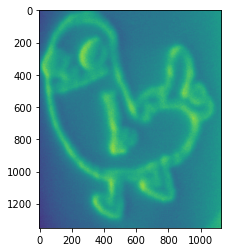

In [158]:
f0_c = f0[250:1600, 500:1630]
plt.imshow(f0_c)

Hvis beskjæringen ikke var bra nok, så bare gå tilbake til "slicing" cellen, og forandre tallene. Deretter kjør cellen med `imshow` på nytt.

## Bilde nummer 2

Nå kan vi legge til flere bilder i samme figur. Dette er veldig nyttig for effektiv bruk av plass i rapporter.

First åpne de en av de andre bildene (`bilde1.tif`), via `imread`. Kall den `bildedata1`. Deretter plot den via `plt.imshow`

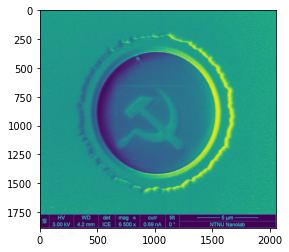

In [159]:
f1 = tiffile.imread("bilde1.tif")
plt.imshow(f1)

### Rotere og beskjære

Her må vi både beskjære og rotere.

Beskjær på samme måte som det forrige bildet, via numpy slicing.

Så må denne roteres, slik at den blir horisontal.

Først må vi importere en rotasjonsfunksjon fra `scipy`, denne er sub-modulen `ndimage`, og funksjonen heter `rotate`. Her kan `from ... import ...` brukes

Bruk `rotate`, til å gjøre vinduet horisontalt. Lag en ny variabel som heter `bildedata1_c`. Bruk docstring til å se hvordan den virker.

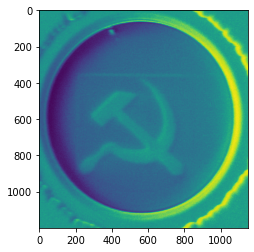

In [160]:
from scipy.ndimage import rotate
f1_cr = f1[300:1500, 450:1600]
#f1_cr = rotate(f1_c, 89.5)[40:370, 40:1460]
plt.imshow(f1_cr)


### Bilde nummer 3

Tilslutt så åpner vi det siste bildet, og her må vi rotere først, og så beskjære. Filen heter `bilde2.tif`.

Først se hvordan den ser ut via `plt.imshow`

Så roter, slik at den blir horisontal. Lag en ny variabel `temp_bildedata2`

Så beskjær bildet, slik at bare vinduet blir med.

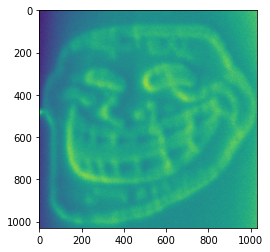

In [161]:
f2 = tiffile.imread("bilde2.tif")
f2_rc = f2[300:1330, 530:1560]
plt.imshow(f2_rc)


## Skalering av data

En viktig del av vitenskapelig data er metadata. Dette er informasjon om dataene: aksjelerasjonsspenning, detektortype, og romlig kalibrering. Det sistnevnte er spesielt viktig for plotting av figurene her, siden vi vil ha en kalibrert "scalebar" i bildet.

Metadataene får vi tilgang til via `tifffile.TiffFile`. Lag et `TiffFile` object `tif0`

Metadataene er i `fei_metadata` i `tif0`. Husk at du kan "minimere" resultater fra celler ved å trykke på den blå vertikale linjen til venstre for cellen.

Dette inneholder veldig mye informasjon, som er nyttig når man skal skrive om dataene i ettertid. Spesielt siden det er lett å glemme å skrive ned metadata.

Romlig kalibrering er i `['EScan']['PixelWidth']`, i dette tilfellet er `PixelWidth` og `PixelHeight` det samme. Så vi trenger bare en av dem. Lagre denne i en ny variabel: `skala0`

Gjenta dette for `bilde1.tif` og `bilde2.tif`, slik at du får en `skala1` og `skala2`.

In [162]:
tif0 = tiffile.TiffFile("bilde0.tif")
skala0 = tif0.fei_metadata["EScan"]["PixelWidth"]
tif1 = tiffile.TiffFile("bilde1.tif")
skala1 = tif0.fei_metadata["EScan"]["PixelWidth"]
tif2 = tiffile.TiffFile("bilde2.tif")
skala2 = tif0.fei_metadata["EScan"]["PixelWidth"]

# Lage plot med alle bildene

Nå som vi har gjort de 3 bildene klare, så kan vi kombinere dem i en figur.

Første steget er å lage et figur objekt `fig` og en liste med 3 sub-plot objekter `axarr`. Dette lages via `plt.subplots`.

Tips: se på docstring med `Shift` + `Tab`, og bla ned til `Examples`. Her er vi ute etter å lage en figur, med tre vertikale subplot.

Deretter "hent" ut de forskjellige subplottene fra `axarr`: `ax0`, `ax1`, `ax2`. Husk at denne er en liste.

Så kan vi bruke `imshow` på hvert av disse subplottene, til å plotte bildene. Men først må vi ordne skaleringen, siden vi vil plotte dataene i mikrometer.

Dette gjøres via `extent` i `imshow`. Formattet er: `[left, right, bottom, top]`.

Lag `extent0`, `extent1` og `extent2`, i form av en liste.

Merk at dette er i meter, så det må endres til mikrometer.

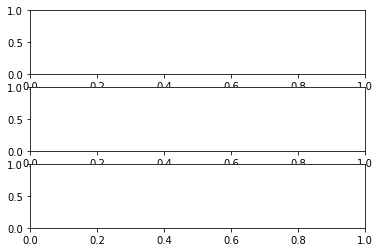

In [163]:
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
extent0 = [0, skala0 * f0_c.shape[1] * 10**6, 0, skala0 * f0_c.shape[0] * 10**6]
extent1 = [0, skala2 * f1_cr.shape[1] * 10**6, 0, skala1 * f1_cr.shape[0] * 10**6]
extent2 = [0, skala2 * f2_rc.shape[1] * 10**6, 0, skala2 * f2_rc.shape[0] * 10**6]

Så kan vi bruke dette i `imshow`. Bruk `imshow` i `ax0`, `ax1` og `ax2`, kombinert med `extent0`, `extent1`, og `extent2`.

Tips: husk at det er veldig mye informasjon i docstrings! (`Shift` + `Tab`)

In [164]:
ax0.imshow(f0_c, extent = extent0)

In [165]:
ax1.imshow(f1_cr, extent = extent1)

In [166]:
ax2.imshow(f2_rc, extent = extent2)

For å se på resultatet, så vi må lagre dette som en bildefil. Dette gjøres via `savefig` i `fig` objektet.

Figuren lagres via `savefig` i `fig` objektet: `bilde.jpg`

In [167]:
fig.savefig("bilde.png", dpi = 300)

Åpne dette bildet, f.eks. ved å trykke på "Refresh File List" i JupyterLab, eller åpne filen direkte på datamaskinen.

Nå kan vi se hvordan figuren ser ut, og at det er en del ting som mangler.

- Oppløsningen er dårlig
- Masse ekstra "tomrom" som vi ikke bryr oss om
- Vi vil heller ha en "scale bar" enn å ha tallene på x- og y-aksen
- Det mangler annoteringer
- Bildene har litt forskjellige størrelser: dette kan løses ved å at beskjæringen tilpasses slik at alle har samme forhold mellom bredde og høyde.

## Høyere oppløsning

Øke oppløsning er enklelt: bruk `dpi` parameteren i `savefig`. F.eks. sett den til `300`.

## Legge til en skalebar

Dette er litt komplisert kode, og bruker avanserte `matplotlib` funksjoner.

In [168]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patheffects as patheffects
fontprops = fm.FontProperties(size=10)

In [169]:
scalebar_kwargs = {'size': 1, 'label': '1 µm', 'loc': 4, 'frameon': False, 'color': 'white', 'size_vertical': 0.2, 'label_top': False, 'fontproperties': fontprops}
scalebar0 = AnchoredSizeBar(transform=ax0.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar0.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax0.add_artist(scalebar0)

In [170]:
scalebar1 = AnchoredSizeBar(transform=ax1.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar1.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax1.add_artist(scalebar1)

In [171]:
scalebar2 = AnchoredSizeBar(transform=ax2.transData, **scalebar_kwargs)
# Denne legger til et svart omriss rundt scalebar teksten, for å gjøre den lettere å lese
scalebar2.txt_label._text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='black', capstyle="round")])
ax2.add_artist(scalebar2)

In [172]:
fig.savefig("bilde.png", dpi=300)

## Legg til annoteringer

### a, b og c

Legge til markering av subplottene, sånn som `a`, `b` og `c`. Dette kan gjøres via `ax` sin `annotate` funksjon. Sjekk docstring for informasjon. Bruk `xycoords='axes fraction'`, `fontsize` og `color`.

Gjør dette for både `ax0`, `ax1` og `ax2`.

Så lagre `bilde.jpg` på nytt.

In [173]:
ax0.annotate("a", (0.05, 0.1), xycoords='axes fraction', fontsize = 12, color = "k")
ax1.annotate("b", (0.05, 0.1), xycoords='axes fraction', fontsize = 12, color = "k")
ax2.annotate("c", (0.05, 0.1), xycoords='axes fraction', fontsize = 12, color = "k")
fig.savefig("bilde.png", dpi=300)

### Tall på objektene

Så legg til annoteringer på selve objektene, igjen ved å bruke `annotate`.

## Fjerne "akse-tall"

Fjerne tallene rundt plottet, ved å bruke `set_xticks([])` og `set_yticks([])` i `ax`-objektene.

In [174]:
ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
fig.subplots_adjust()
fig.savefig("bilde.png", dpi=300)

## Fjerne tomrom i `fig`

Tilslutt, så fjerner vi tomrom rundt `fig` ved å bruke `subplots_adjust`

Det siste tomrommet kom fjernes ved å fin-innstille `figwidth` og `figheight` via `fig.set_figwidth` og `fig.set_figheight`. For å se hva den er nå, bruk `fig.get_figwidth()` og `fig.get_figheight()`

In [175]:
print(fig.get_figwidth())
print(fig.get_figheight())
#fig.set_figwidth(4)
#fig.set_figheight(3.5)
#fig.savefig("bilde.png")


6.0
4.0


# Deres egne data

Nå skal dere bruke denne Jupyter Notebooken til å lage tilsvarende figur, men med dataene dere tok opp i FIB-laben.

## Måter figurene kan tilpasses:
- `cmap` parameteren i `imshow`. For eksempel: `ax.imshow(..., cmap='inferno')`. Se [matplotlib sin dokumentasjon](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for en liste over fargekart. Merk at "perceptually uniform colormaps" er foretrukket i datavisualisering!
- Subplot posisjonering og størrelser kan kontrolleres med `add_subplot` og `GridSpec`
    * `add_subplot`: https://matplotlib.org/stable/tutorials/intermediate/gridspec.html#basic-quickstart-guide
    * `GridSpec`, mer komplisert, men mer kontroll: https://matplotlib.org/stable/tutorials/intermediate/gridspec.html#fine-adjustments-to-a-gridspec-layout 

# Fler eksempler på hva man kan gjøre med NumPy + matplotlib

* https://en.wikipedia.org/wiki/Quantum_dot#/media/File:Gaas_inas_quantum_dot.jpg
* https://en.wikipedia.org/wiki/Perovskite_(structure)#/media/File:Perovskite_oxide_thin_film.jpg med atomstruktur [Atomic Simulation Environment](https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html#matplotlib) (ASE)
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Scanning_transmission_electron_microscopy_srtio3_compare_adf_abf.jpg
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Stem_dpc_schematic_magnetic_explanation.jpg
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Ferromagnetic_domains_in_spiral_pattern_for_Fe60Al40.jpg
* https://en.wikipedia.org/wiki/Electron_energy_loss_spectroscopy#/media/File:Electron_energy_loss_spectrum_feature_overview.svg
* https://en.wikipedia.org/wiki/Electron_energy_loss_spectroscopy#/media/File:Electron_energy_loss_spectroscopy_coreloss_lsmo.svg